In [8]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import sounddevice as sd
import soundfile as sf

[[ 0.0000000e+00  1.5258789e-05 -3.0517578e-05 ... -1.7395020e-03
  -1.7547607e-03 -1.8463135e-03]]


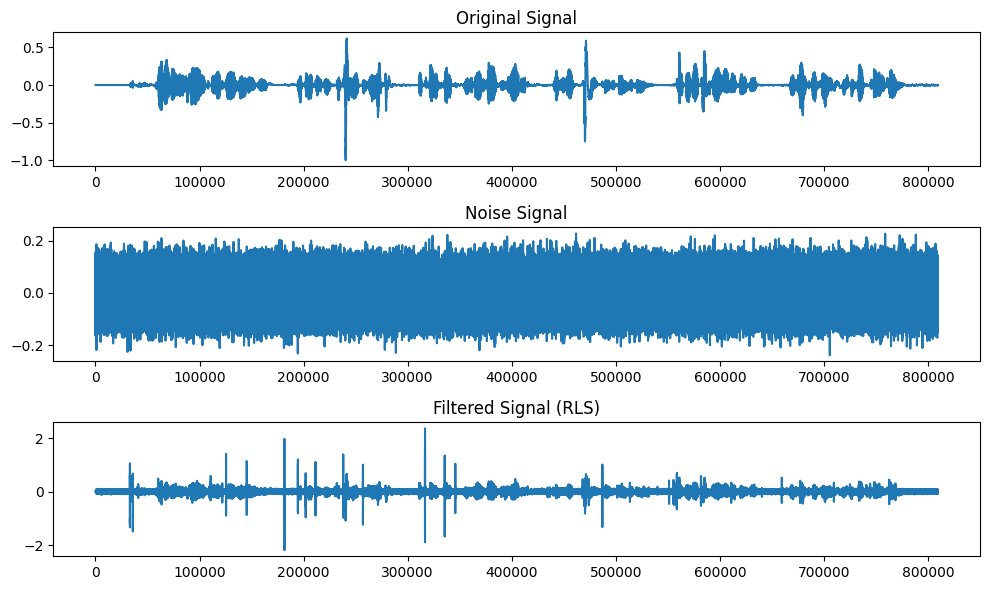

In [14]:


def RLS(audio_signal, desired_signal, order, forgetting_factor):
    # Initialize variables
    N = len(audio_signal)
    w = np.zeros(order)
    P = np.eye(order) * 1e6  # Initialize the inverse correlation matrix
    output_signal = np.zeros(N)
    
    for i in range(N):
        # Extract the input signal vector
        x = np.zeros(order)
        for j in range(order):
            if i - j >= 0:
                x[j] = audio_signal[i - j]
        
        # Compute the output of the filter
        y = np.dot(w, x)
        output_signal[i] = y
        
        # Compute the error
        e = desired_signal[i] - y
        
        # Compute the gain vector
        k = np.dot(P, x) / (forgetting_factor + np.dot(x, np.dot(P, x)))
        
        # Update the filter coefficients
        w = w + k * e
        
        
        # Update the inverse correlation matrix
        P = (P - np.outer(k, np.dot(x, P))) / forgetting_factor
    
    return output_signal

# Load the audio file
file_path = r"E:\frnds\python\clean_speech\harvard.wav"

audio_signal, sample_rate = librosa.load(file_path, sr=None)
noise = 0.05*np.random.randn(len(audio_signal))
noisy_input_signal = audio_signal + noise
print(np.array([audio_signal]))
# Generate a desired signal (for demonstration purposes)

# Apply the RLS algorithm to the audio signal
order = 50  # Filter order
forgetting_factor = 0.99  # Forgetting factor
output_signal = RLS(audio_signal, noisy_input_signal, order, forgetting_factor)

# Write the output signal to a new audio file
sf.write("output.wav", output_signal, sample_rate)
sf.write("noise_signal.wav",noisy_input_signal,sample_rate)
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(audio_signal)
plt.title('Original Signal')

plt.subplot(3, 1, 2)
plt.plot(noise)
plt.title('Noise Signal')

plt.subplot(3, 1, 3)
#
plt.plot(output_signal)
plt.title('Filtered Signal (RLS)')

plt.tight_layout()
plt.show()


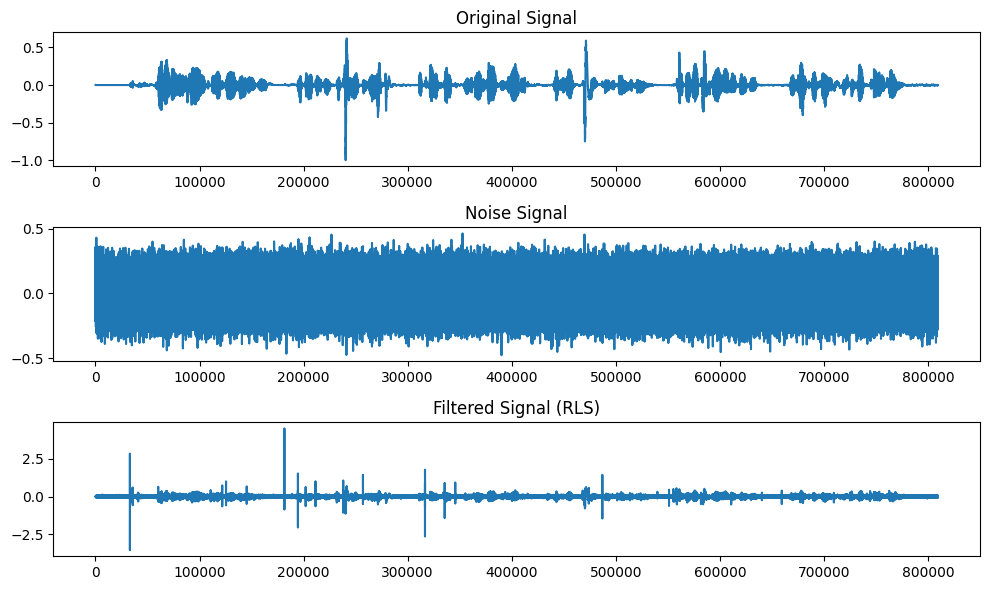

In [24]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

def RLS(audio_signal, desired_signal, order, forgetting_factor):
    N = len(audio_signal)
    w = np.zeros(order)
    P = np.eye(order) * 1e6  # Initialize the inverse correlation matrix
    output_signal = np.zeros(N)
    
    for i in range(N):
        # Extract the input signal vector
        x = np.zeros(order)
        for j in range(order):
            if i - j >= 0:
                x[j] = audio_signal[i - j]
        
        # Compute the output of the filter
        y = np.dot(w, x)
        output_signal[i] = y
        
        # Compute the error
        e = desired_signal[i] - y
        
        # Compute the gain vector
        k = np.dot(P, x) / (forgetting_factor + np.dot(x, np.dot(P, x)))
        
        # Update the filter coefficients
        w = w + k * e
        
        # Update the inverse correlation matrix
        P = (P - np.outer(k, np.dot(x, P))) / forgetting_factor
    
    return output_signal

# Load the audio file
file_path = r"E:\frnds\python\clean_speech\harvard.wav"
audio_signal, sample_rate = librosa.load(file_path, sr=None)
noise =0.1* np.random.randn(len(audio_signal))
noisy_input_signal = audio_signal + noise

# Apply the RLS algorithm to the audio signal
order = 50 # Filter order
forgetting_factor = 0.99  # Forgetting factor
output_signal = RLS(audio_signal, noisy_input_signal, order, forgetting_factor)

# Write the output signal to a new audio file
sf.write("output.wav", output_signal, sample_rate)
sf.write("noise_signal.wav", noisy_input_signal, sample_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(audio_signal)
plt.title('Original Signal')

plt.subplot(3, 1, 2)
plt.plot(noise)
plt.title('Noise Signal')

plt.subplot(3, 1, 3)
plt.plot(output_signal)
plt.title('Filtered Signal (RLS)')

plt.tight_layout()
plt.show()
